In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
features_raw = pd.read_csv('parliament_processed_final.csv')

In [77]:
features_raw['SessionNumber'] = features_raw['SessionNumber'].astype('category')
features_raw['ParliamentNumber'] = features_raw['ParliamentNumber'].astype('category')
features_raw['BillMonthOfYear'] = features_raw['BillMonthOfYear'].astype('category')

In [78]:
features_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 12 columns):
BillNumberOfPages       529 non-null float64
BillType                537 non-null object
DaysUntilRoyalAssent    537 non-null int64
ParliamentNumber        537 non-null category
SessionNumber           537 non-null category
PrimeMinisterName       537 non-null object
PrimeMinisterParty      537 non-null object
SponsorGender           537 non-null object
SponsorParty            537 non-null object
SponsorTitle            535 non-null object
BillMonthOfYear         537 non-null category
IsSponsorInPower        537 non-null bool
dtypes: bool(1), category(3), float64(1), int64(1), object(6)
memory usage: 35.9+ KB


In [79]:
features_raw = features_raw.dropna(axis=0)

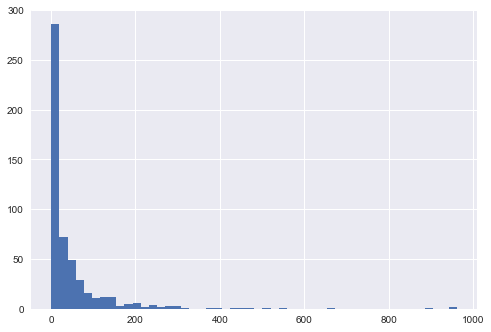

In [80]:
plt.hist(features_raw['BillNumberOfPages'], bins=50);

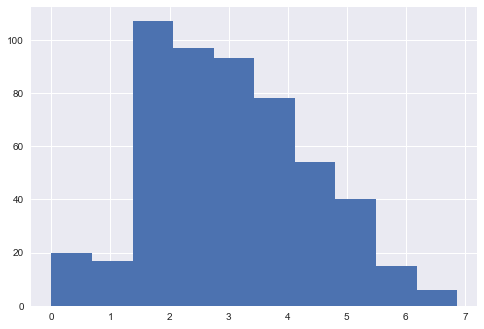

In [81]:
plt.hist(np.log(features_raw['BillNumberOfPages']));

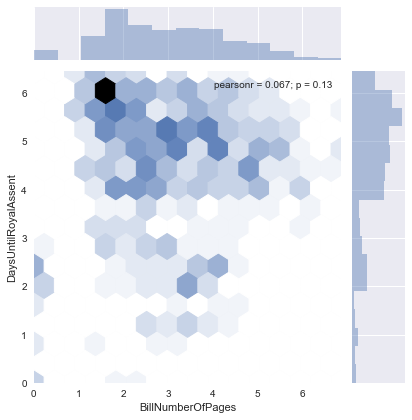

In [120]:
x = np.log(features_raw['BillNumberOfPages'])
y = np.log(features_raw['DaysUntilRoyalAssent'])
# plt.scatter(x, features_raw['DaysUntilRoyalAssent'])
# plt.xlabel('Log Number of Pages of Bill')
# plt.ylabel('Days Until Royal Assent')
# sns.jointplot(x, features_raw['DaysUntilRoyalAssent'])
sns.jointplot(x, y, kind='hex')

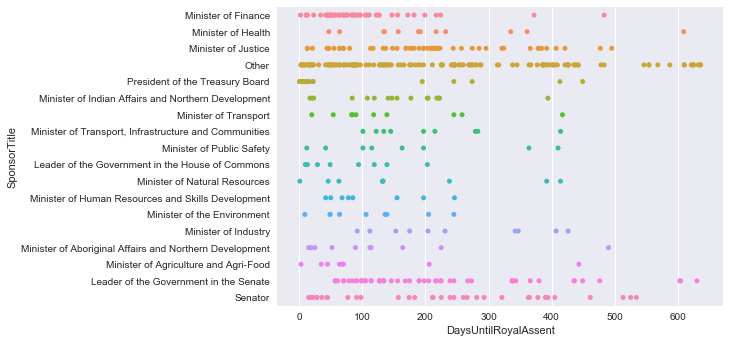

In [83]:
st = sns.stripplot(x='DaysUntilRoyalAssent', y='SponsorTitle', data=features_raw)

In [84]:
features_raw.describe().DaysUntilRoyalAssent

count    527.000000
mean     171.958254
std      156.310145
min        1.000000
25%       48.500000
50%      129.000000
75%      246.000000
max      636.000000
Name: DaysUntilRoyalAssent, dtype: float64

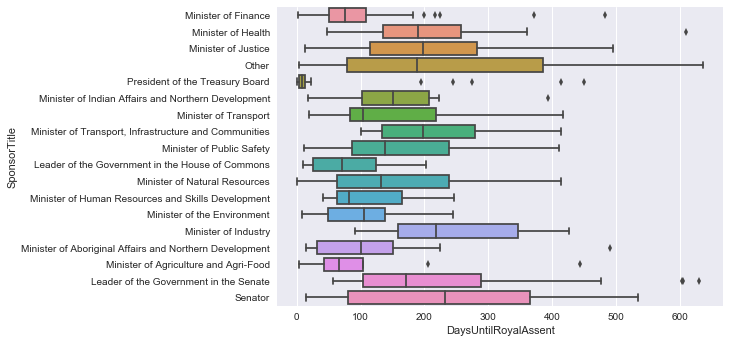

In [92]:
st = sns.boxplot(x='DaysUntilRoyalAssent', y='SponsorTitle', data=features_raw)

In [122]:
features_raw.SponsorTitle.value_counts()

Other                                                      155
President of the Treasury Board                             68
Leader of the Government in the Senate                      52
Minister of Finance                                         51
Minister of Justice                                         50
Senator                                                     34
Minister of Indian Affairs and Northern Development         16
Minister of Health                                          12
Minister of Industry                                        10
Minister of Transport                                       10
Minister of Aboriginal Affairs and Northern Development     10
Minister of Transport, Infrastructure and Communities        9
Minister of Natural Resources                                9
Minister of the Environment                                  9
Minister of Public Safety                                    8
Leader of the Government in the House of Commons       

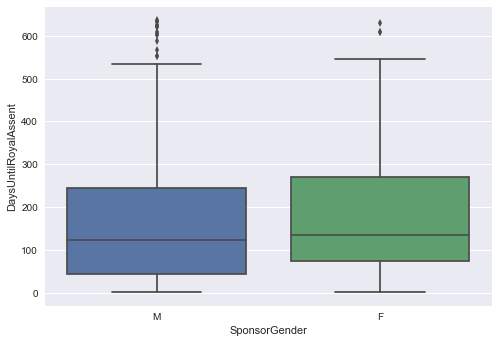

In [86]:
sg = sns.boxplot(x='SponsorGender', y='DaysUntilRoyalAssent', data=features_raw)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

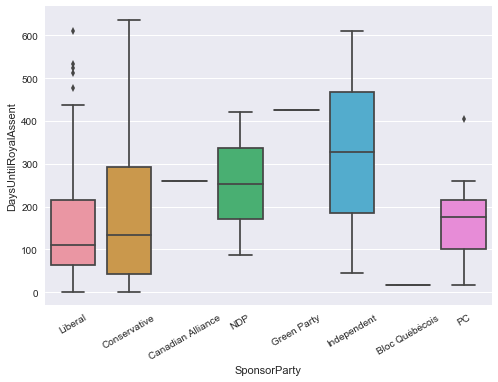

In [99]:
sp = sns.boxplot(x='SponsorParty', y='DaysUntilRoyalAssent', data=features_raw)
plt.xticks(rotation=30)

In [88]:
# import calendar
# features_raw['BillMonthOfYear'] = pd.Series(calendar.month_name[month] for month in features_raw['BillMonthOfYear'])

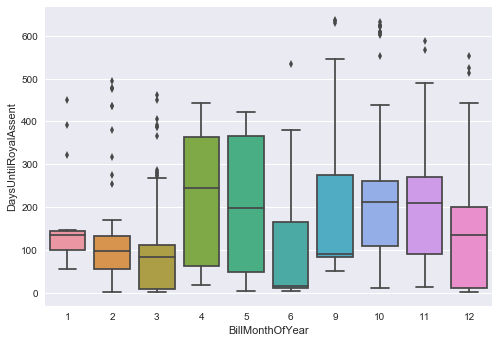

In [98]:
sns.boxplot(x='BillMonthOfYear', y='DaysUntilRoyalAssent', data=features_raw)

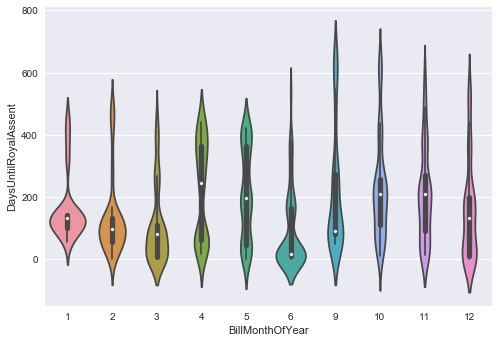

In [111]:
sns.violinplot(x='BillMonthOfYear', y='DaysUntilRoyalAssent', bw=0.33, data=features_raw)

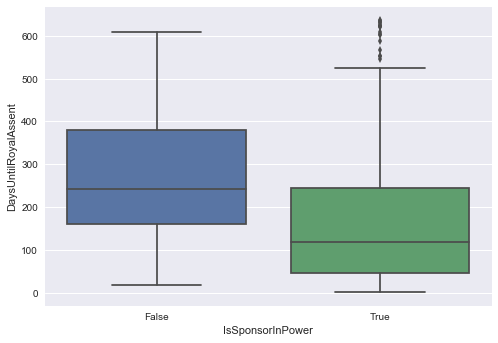

In [121]:
sns.boxplot(x='IsSponsorInPower', y='DaysUntilRoyalAssent', data=features_raw)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

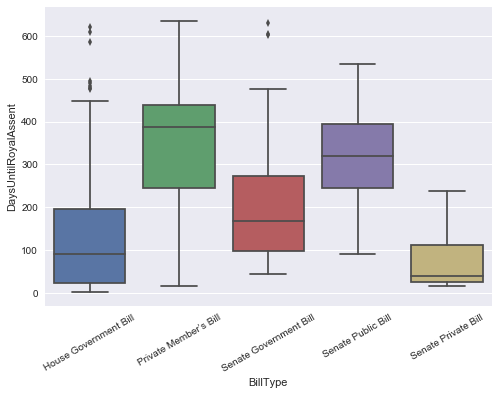

In [124]:
sns.boxplot(x='BillType', y='DaysUntilRoyalAssent', data=features_raw)
plt.xticks(rotation=30)

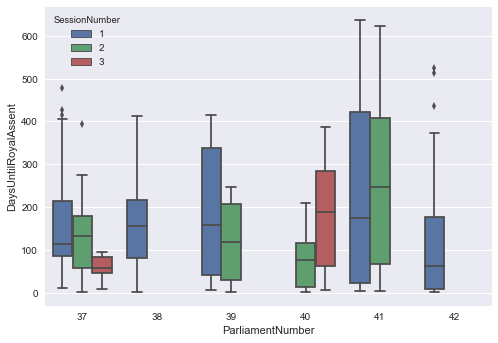

In [127]:
sns.boxplot(x='ParliamentNumber', y='DaysUntilRoyalAssent', hue='SessionNumber', data=features_raw)

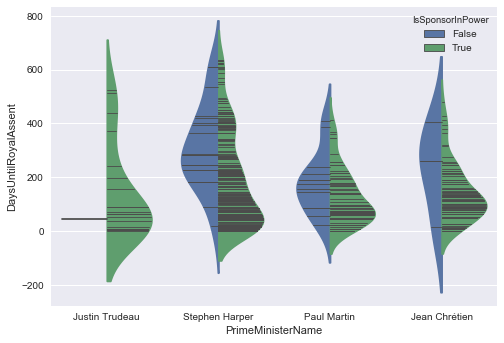

In [137]:
sns.violinplot(x='PrimeMinisterName', y='DaysUntilRoyalAssent', hue='IsSponsorInPower', data=features_raw, split=True, inner='stick')